In [294]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('chess_games_updated.csv')
df.head()

,Event,White,Black,Result,WhiteElo,BlackElo,ECO,Opening,TimeControl,Termination,AN
0,Classical,eisaaaa,HAMID449,1-0,1901,1896,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...
1,Blitz,go4jas,Sergei1973,0-1,1641,1627,C20,King's Pawn Opening: 2.b3,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...
2,Blitz tournament,Evangelistaizac,kafune,1-0,1647,1688,B01,Scandinavian Defense: Mieses-Kotroc Variation,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....
3,Correspondence,Jvayne,Wsjvayne,1-0,1706,1317,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...
4,Blitz tournament,kyoday,BrettDale,0-1,1945,1900,B90,"Sicilian Defense: Najdorf, Lipnitsky Attack",180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...


In [3]:
df[['Opening', 'Variation', 'Subvariation']] = df['Opening'].str.split(':', expand=True)
df.head()

,Event,White,Black,Result,WhiteElo,BlackElo,ECO,Opening,TimeControl,Termination,AN,Variation,Subvariation
0,Classical,eisaaaa,HAMID449,1-0,1901,1896,D10,Slav Defense,300+5,Time forfeit,1. d4 d5 2. c4 c6 3. e3 a6 4. Nf3 e5 5. cxd5 e...,None,None
1,Blitz,go4jas,Sergei1973,0-1,1641,1627,C20,King's Pawn Opening,300+0,Normal,1. e4 e5 2. b3 Nf6 3. Bb2 Nc6 4. Nf3 d6 5. d3 ...,2.b3,None
2,Blitz tournament,Evangelistaizac,kafune,1-0,1647,1688,B01,Scandinavian Defense,180+0,Time forfeit,1. e4 d5 2. exd5 Qxd5 3. Nf3 Bg4 4. Be2 Nf6 5....,Mieses-Kotroc Variation,None
3,Correspondence,Jvayne,Wsjvayne,1-0,1706,1317,A00,Van't Kruijs Opening,-,Normal,1. e3 Nf6 2. Bc4 d6 3. e4 e6 4. Nf3 Nxe4 5. Nd...,None,None
4,Blitz tournament,kyoday,BrettDale,0-1,1945,1900,B90,Sicilian Defense,180+0,Time forfeit,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,"Najdorf, Lipnitsky Attack",None


In [343]:
G = nx.DiGraph()
board = []
for _ in {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'}:
    for i in range(1,9):
        board.append(_ + str(i))
        G.add_node(_ + str(i))

for _ in {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'}:
    G.add_node(_)

for _ in {'R', 'N', 'B', 'Q', 'K'}:
    G.add_node(_)

for _ in {'R', 'N', 'B', 'Q', 'K'}:
    for f in {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 1, 2, 3, 4, 5, 6, 7, 8}:
        G.add_node(_+str(f))

for u in G.nodes:
    for v in G.nodes:
        G.add_edge(u, v, weight = 0)

In [374]:
for _ in df['AN']:
    for char in range(0, len(_)):
        if _[char] == 'x' and _[char-1] in {'R', 'N', 'B', 'Q', 'K'} and _[char-5] == '.':
            w = G.edges[_[char-1], _[char+1]+_[char+2]]['weight']
            G.add_edge(_[char-1], _[char+1]+_[char+2], weight = w+1)

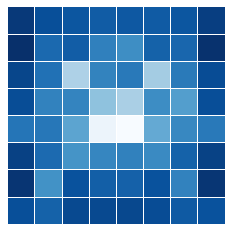

In [375]:
Q = [[0 for i in range(8)] for j in range(8)]
for u,v,d in G.edges(data=True):
    if u == 'Q' and v in board:
        f = int(ord(v[0])-96)-1
        r = int(v[1])-1
        Q[f][r] = d['weight']

ax = sns.heatmap(Q, linewidth=0.5, square=True, cbar=False, xticklabels=False, yticklabels=False, cmap='Blues_r')
ax.invert_yaxis()

plt.show()

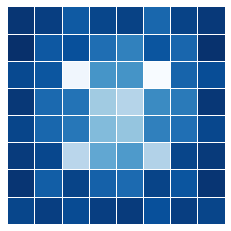

In [376]:
B = [[0 for i in range(8)] for j in range(8)]
for u,v,d in G.edges(data=True):
    if u == 'B' and v in board:
        f = int(ord(v[0])-96)-1
        r = int(v[1])-1
        B[f][r] = d['weight']

ax = sns.heatmap(B, linewidth=0.5, square=True, cbar=False, xticklabels=False, yticklabels=False, cmap='Blues_r')
ax.invert_yaxis()

plt.show()

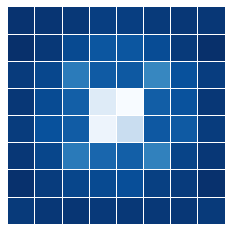

In [377]:
N = [[0 for i in range(8)] for j in range(8)]
for u, v, d in G.edges(data=True):
    if u == 'N' and v in board:
        f = int(ord(v[0]) - 96) - 1
        r = int(v[1]) - 1
        K[f][r] = d['weight']

ax = sns.heatmap(K, linewidth=0.5, square=True, cbar=False, xticklabels=False, yticklabels=False, cmap='Blues_r')
ax.invert_yaxis()

plt.show()

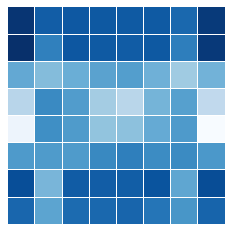

In [378]:
R = [[0 for i in range(8)] for j in range(8)]
for u, v, d in G.edges(data=True):
    if u == 'R' and v in board:
        f = int(ord(v[0]) - 96) - 1
        r = int(v[1]) - 1
        R[f][r] = d['weight']

ax = sns.heatmap(R, linewidth=0.5, square=True, cbar=False, xticklabels=False, yticklabels=False, cmap='Blues_r')
ax.invert_yaxis()

plt.show()

In [353]:
C = nx.DiGraph()
board = []
for _ in {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'}:
    for i in range(1,9):
        board.append(_ + str(i))
        C.add_node(_ + str(i))

for _ in {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'}:
    C.add_node(_)

for _ in {'R', 'N', 'B', 'Q', 'K'}:
    C.add_node(_, color='blue', weight=0)

for _ in {'R', 'N', 'B', 'Q'}:
    for f in {'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 1, 2, 3, 4, 5, 6, 7, 8}:
        C.add_node(_+str(f))

for u in C.nodes:
    for v in C.nodes:
        C.add_edge(u, v, weight = 0)

In [369]:
for _ in df['AN']:
    for char in range(0, len(_)):
        if _[char] == '+' and _[char-3] in {'R', 'N', 'B', 'Q'} and _[char-5] == '.':
            w = C.edges[_[char-3], _[char-2]+_[char-1]]['weight']
            C.add_edge(_[char-3], _[char-2]+_[char-1], weight = w+1)

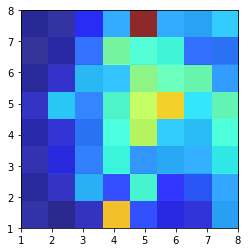

In [370]:
Q = [[0 for i in range(8)] for j in range(8)]
for u,v,d in C.edges(data=True):
    if u == 'Q' and v in board:
        f = int(ord(v[0])-96)-1
        r = int(v[1])-1
        Q[f][r] = d['weight']

fig = plt.figure(frameon=False)

extent = 1,8,1,8
chessboard = np.add.outer(range(8), range(8)) % 2  # chessboard
im1 = plt.imshow(chessboard, cmap=plt.cm.gray, alpha=0.2,interpolation='nearest', extent=extent)
im2 = plt.imshow(Q, cmap=plt.cm.jet, alpha=0.8, origin='lower', extent=extent)

plt.show()

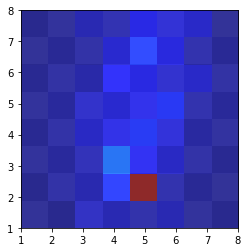

In [371]:
B = [[0 for i in range(8)] for j in range(8)]
for u,v,d in C.edges(data=True):
    if u == 'B' and v in board:
        f = int(ord(v[0])-96)-1
        r = int(v[1])-1
        B[f][r] = d['weight']

fig = plt.figure(frameon=False)

extent = 1,8,1,8
chessboard = np.add.outer(range(8), range(8)) % 2  # chessboard
im1 = plt.imshow(chessboard, cmap=plt.cm.gray, alpha=0.2,interpolation='nearest', extent=extent)
im2 = plt.imshow(B, cmap=plt.cm.jet, alpha=0.8, origin='lower', extent=extent)

plt.show()

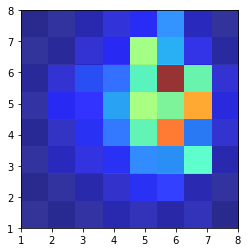

In [372]:
N = [[0 for i in range(8)] for j in range(8)]
for u,v,d in C.edges(data=True):
    if u == 'N' and v in board:
        f = int(ord(v[0])-96)-1
        r = int(v[1])-1
        N[f][r] = d['weight']

fig = plt.figure(frameon=False)

extent = 1,8,1,8
chessboard = np.add.outer(range(8), range(8)) % 2  # chessboard
im1 = plt.imshow(chessboard, cmap=plt.cm.gray, alpha=0.2,interpolation='nearest', extent=extent)
im2 = plt.imshow(N, cmap=plt.cm.jet, alpha=0.8, origin='lower', extent=extent)

plt.show()

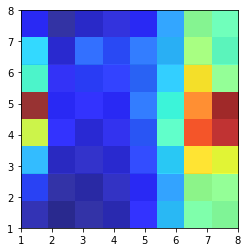

In [373]:
R = [[0 for i in range(8)] for j in range(8)]
for u,v,d in C.edges(data=True):
    if u == 'R' and v in board:
        f = int(ord(v[0])-96)-1
        r = int(v[1])-1
        R[f][r] = d['weight']

fig = plt.figure(frameon=False)

extent = 1,8,1,8
chessboard = np.add.outer(range(8), range(8)) % 2  # chessboard
im1 = plt.imshow(chessboard, cmap=plt.cm.gray, alpha=0.2,interpolation='nearest', extent=extent)
im2 = plt.imshow(R, cmap=plt.cm.jet, alpha=0.8, origin='lower', extent=extent)

plt.show()

In [425]:
from sklearn.cluster import KMeans
df5 = df[df.Event == 'Classical Tournament']
kmeans = KMeans(n_clusters=3).fit(df5[['WhiteElo', 'BlackElo']])

# print("Labels:",kmeans.labels_)
# print("Centers:",kmeans.cluster_centers_)
# print("Inertia:",kmeans.inertia_) #sum of squared distances to closest center
# df_topOpenings['Opening']=kmeans.labels_
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df5['WhiteElo'], df5['BlackElo'],c='k',s=5)
plt.title("Simulated Data")
plt.xlabel("WhiteElo")
plt.ylabel("BlackElo")
plt.show()

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.